In [30]:
import numpy as np
from playsound import playsound
import matplotlib.pyplot as plt
import librosa
import librosa.display

### 파일 재생

In [3]:
playsound('KsponSpeech_124068.wav')

### 음성파일의 samplling rate, sampling된 값을 얻어옴

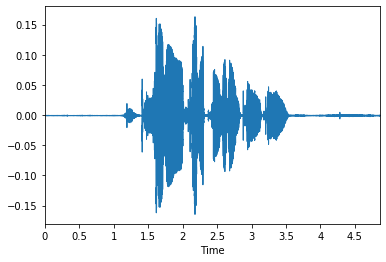

In [45]:
# reading the wav file
amplitude, sample_rate = librosa.load('KsponSpeech_124068.wav')
amplitude, _ = librosa.effects.trim(amplitude)
librosa.display.waveplot(amplitude, sr = sample_rate)

## Fourier Transform(fast fourier transform)

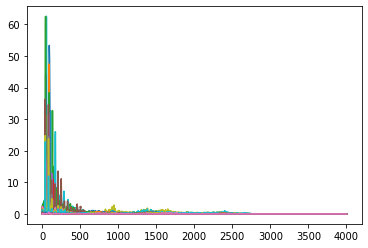

In [58]:
n_fft = 8000
D = np.abs(librosa.stft(amplitude, n_fft = n_fft, hop_length = 4000))
plt.plot(D)

## fourier transform output on time dimmension

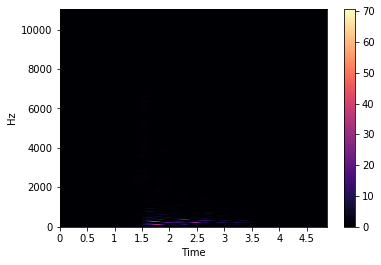

In [67]:
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sample_rate, x_axis='time', y_axis='linear');
plt.colorbar();

## spectrogram

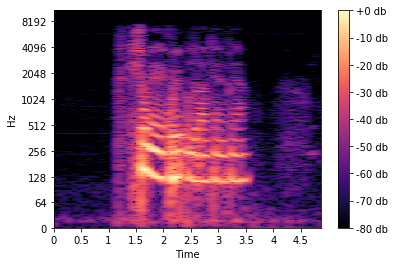

In [68]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr = sample_rate, hop_length = hop_length , x_axis = 'time', y_axis = 'log')
plt.colorbar(format = '%+2.0f db')

In [69]:
n_mels = 128
mel = librosa.filters.mel(sr = sr, n_fft = n_fft, n_mels =  n_mels)

## showing mel filter

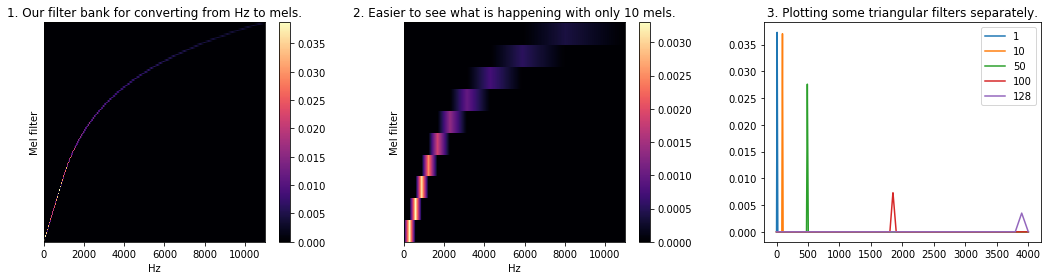

In [70]:
plt.figure(figsize=(15, 4));

plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');

plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');

plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=[f'{i+1}' for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');

plt.tight_layout();